In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from utils.path import paths
from glob import glob
import os 
from random import shuffle
from os.path import join
%matplotlib inline 

In [3]:
alphapose_info=pd.read_csv('alphapose.csv')

In [5]:
alphapose_info

,Model,#Kps,fps
0,Default,17,16.250
1,ResNet50,17,15.725
2,ResNet50-Unshuffle,17,14.650
3,HRNet-W32,17,16.150
4,ResNet50-dcn,17,15.525
5,ResNet152,17,13.350


Text(0, 0.5, '#fps')

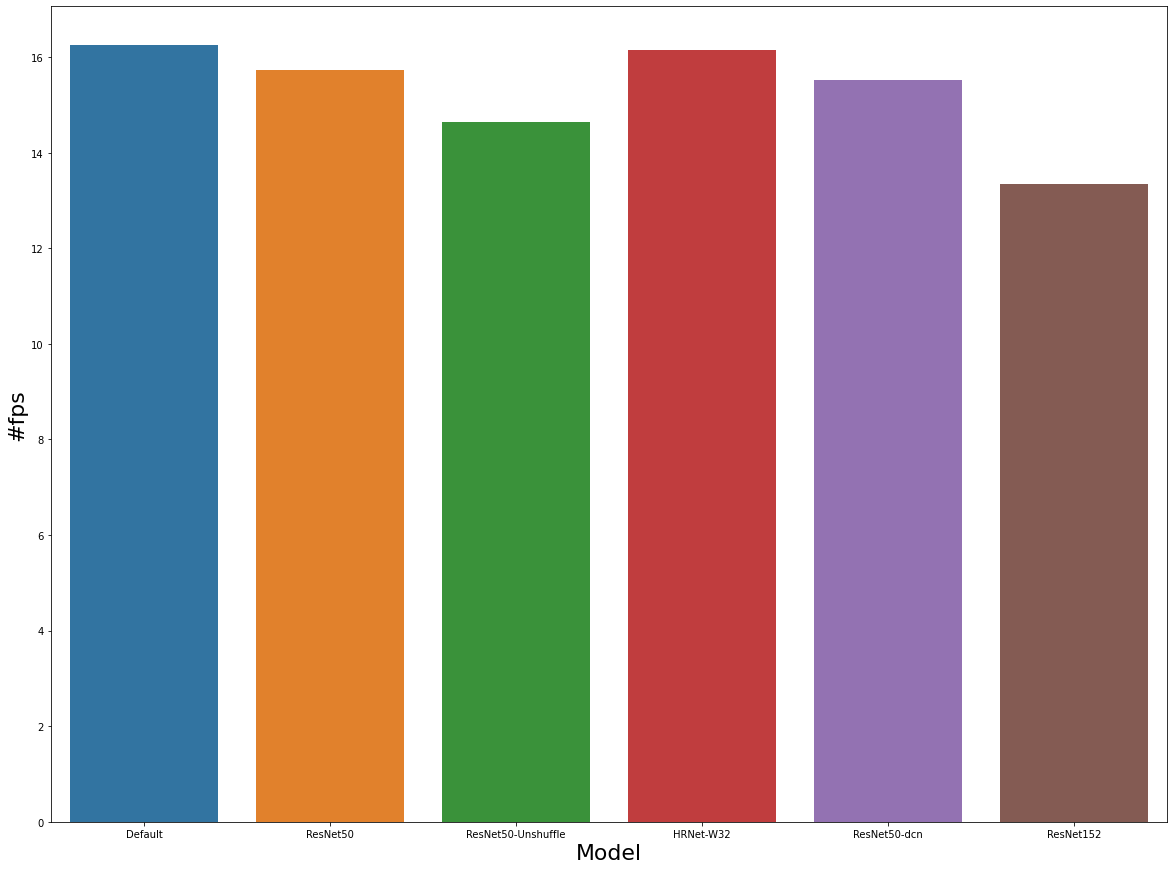

In [18]:
plt.figure(figsize=(20,15))
barplot=sns.barplot(data=alphapose_info,x='Model',y='fps')
plt.xlabel('Model',fontsize=22)
plt.ylabel('#fps',fontsize=22)

In [19]:
fig=barplot.get_figure()

In [20]:
fig.savefig('alphapose_fps.jpg')

In [4]:
## AIHUB
openpose_aihub=join(paths['training_data'],'openpose','AIHUB')
openpifaf_aihub=join(paths['training_data'],'openpifaf','AIHUB')
movenet_aihub=join(paths['training_data'],'movenet','AIHUB')
alphapose_aihub=join(paths['training_data'],'alphapose','AIHUB')

In [5]:
os.listdir(alphapose_aihub)

['avg_conf.npy', 'missiing_points.npy']

In [6]:
## missing_joing
openpose_aihub_missing=np.load(openpose_aihub+'/missiing_points.npy')
openpifaf_aihub_missing=np.load(openpifaf_aihub+'/missiing_points.npy')
movenet_aihub_missing=np.load(movenet_aihub+'/missiing_points.npy')
alphapose_aihub_missing=np.load(alphapose_aihub+'/missiing_points.npy')

In [7]:
openpose_aihub_missing[:1291].shape

(1291,)

In [8]:
len(alphapose_aihub_missing)

1291

In [9]:
missing_point_eldersim={'openpose': openpose_aihub_missing[:1291],
                       'openpifaf':openpifaf_aihub_missing[:1291],
                       'movenet':movenet_aihub_missing[:1291],
                       'alphapose':alphapose_aihub_missing}

In [10]:
df_missing=pd.DataFrame(missing_point_eldersim)

In [11]:
df_missing

,openpose,openpifaf,movenet,alphapose
0,2.92,1.44,1.36,0.000000
1,0.80,15.68,4.76,0.000000
2,0.56,2.04,0.00,0.000000
3,1.84,2.12,0.00,0.000000
4,10.48,0.68,0.00,0.000000
...,...,...,...,...
1286,12.04,1.64,4.76,0.021277
1287,4.64,5.36,6.12,0.000000
1288,5.40,6.92,8.84,0.000000
1289,5.04,11.32,14.96,0.000000


Text(0, 0.5, 'average_missing_keypoints_AIHUB')

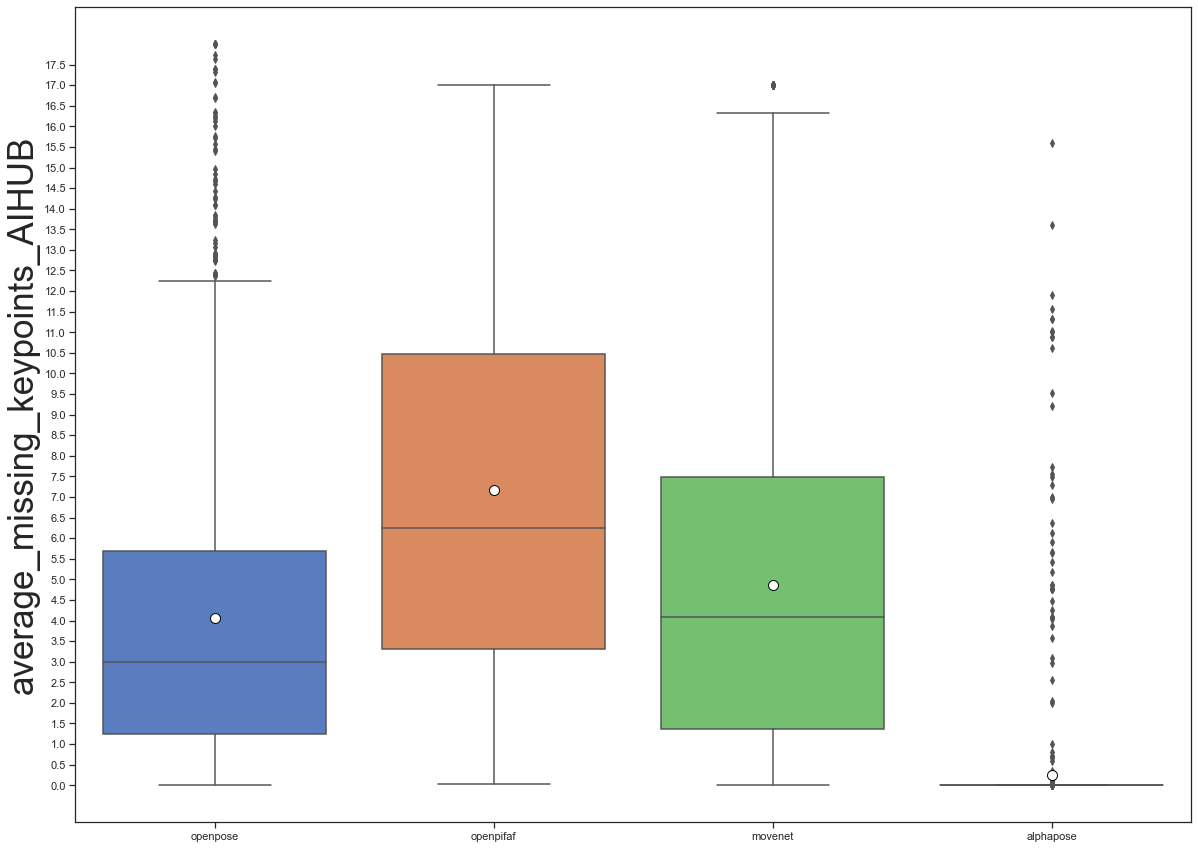

In [12]:
plt.figure(figsize=(20,15))
sns.set(style="ticks", palette="muted", color_codes=True)
sns.color_palette("coolwarm", as_cmap=True)
yticks=np.arange(0,18,0.5)
sns_plot=sns.boxplot(data=df_missing,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yticks(yticks)
plt.ylabel('average_missing_keypoints_AIHUB',fontsize=35)

In [13]:
fig=sns_plot.get_figure()
fig.savefig('average_missing_point_AIHUB.jpg')

In [36]:
openpose_aihub_avg=np.load(openpose_aihub+'/avg_conf.npy')
openpifaf_aihub_avg=np.load(openpifaf_aihub+'/avg_conf.npy')
movenet_aihub_avg=np.load(movenet_aihub+'/avg_conf.npy')
alphapose_aihub_avg=np.load(alphapose_aihub+'/avg_conf.npy')

In [39]:

openpose_avg=openpose_aihub_avg
openpifaf_avg=openpifaf_aihub_avg
movenet_avg=movenet_aihub_avg



In [42]:
openpifaf_avg=random.shuffle(openpifaf_avg)

In [43]:
openpifaf_avg

In [21]:
arr

array([5, 6, 1])

In [ ]:
openpifaf_aihub_avg

In [37]:
avg_aihub={'openpose':openpifaf_aihub_avg,
             'openpifaf':openpifaf_aihub_avg,
             'movenet':movenet_aihub_avg,
             'alphapose':alphapose_aihub_avg}
df_avg_aihub=pd.DataFrame(avg_aihub)

Text(0, 0.5, 'average_confident_AIHUB')

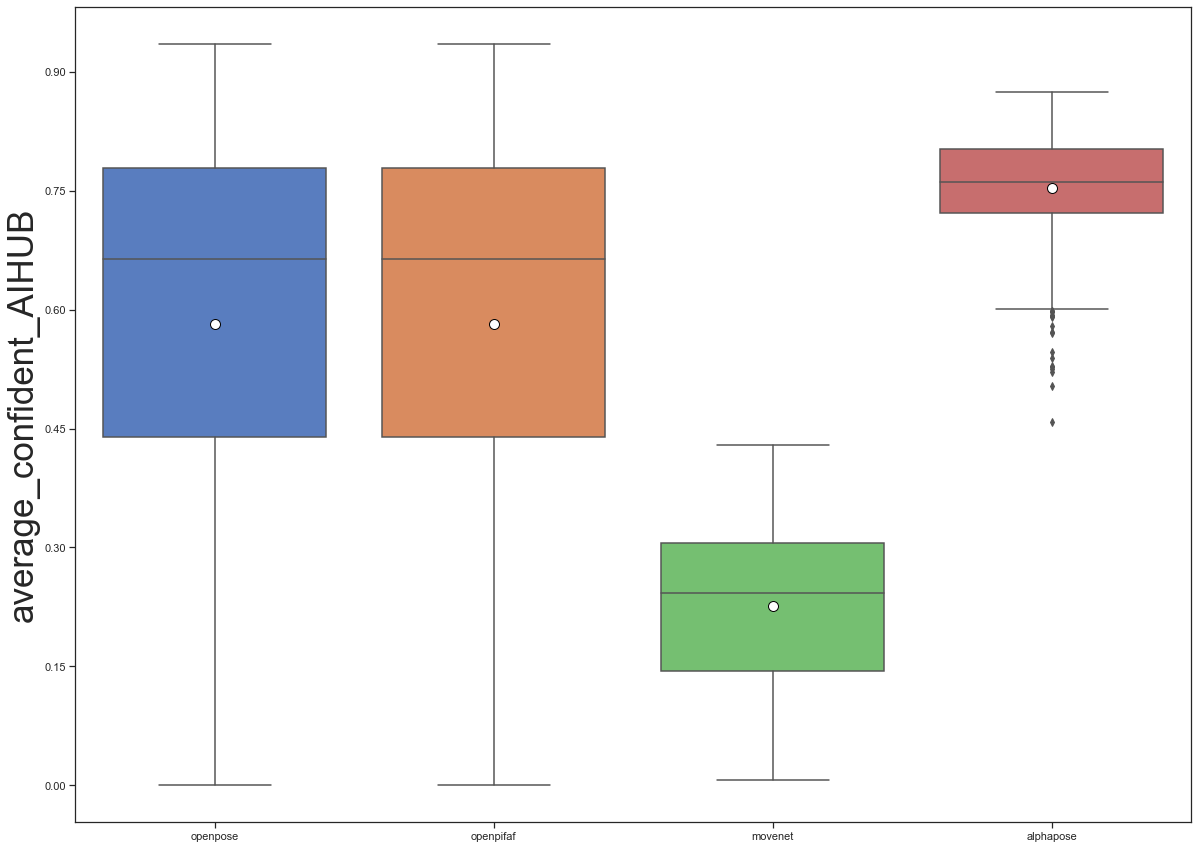

In [38]:
plt.figure(figsize=(20,15))
sns.set(style="ticks", palette="muted", color_codes=True)
sns.color_palette("coolwarm", as_cmap=True)

sns_avg_aihub=sns.boxplot(data=df_avg_aihub,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yticks(np.arange(0,1,0.15))
plt.ylabel('average_confident_AIHUB',fontsize=35)

In [ ]:
fig=sns_avg_aihub.get_figure()
fig.savefig('average_conf_AIHUB.jpg')

In [ ]:
#os.listdir(openpifaf_aihub)
np.load(openpifaf_aihub+'/y_test.npy').shape

In [ ]:
np.load(openpose_aihub+'/y_test.npy').shape

In [ ]:
np.load(movenet_aihub+'/y_test.npy').shape

In [ ]:
features,labels=np.load(movenet_aihub+'/features.npy'),np.load(movenet_aihub+'/labels.npy')

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
saved_dire=os.path.join(paths['training_data'],'movenet','AIHUB')
if not os.path.exists(saved_dire):
    os.makedirs(saved_dire)
np.save("{}/X_train".format(saved_dire),X_train)

np.save("{}/X_test".format(saved_dire),X_test)

np.save("{}/y_train".format(saved_dire),y_train)

np.save("{}/y_test".format(saved_dire),y_test)    